<a href="https://colab.research.google.com/github/kalyaanrr/ECommerceTransactionDataset/blob/main/Kalyaan_Mahendar_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")


**Aggregating Transaction data**

In [20]:
transaction_summary = transactions.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "TransactionID": "count"
}).reset_index()

transaction_summary.rename(columns={"TotalValue": "TotalSpending", "TransactionID": "TransactionCount"}, inplace=True)

**Merging the Datasets**


In [ ]:
merged_data = pd.merge(customers,transaction_summary,on="CustomerID",how="inner")
merged_data.drop(columns=["CustomerName","SignupDate"],inplace=True)
merged_data["Region"] = merged_data["Region"].astype("category").cat.codes


**Scaling the Data**

In [24]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_data.iloc[:, 1:])

db_indices = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)


**Calculating Clustering Metrices**

In [23]:
db_index = davies_bouldin_score(scaled_data, clusters)
db_indices.append(db_index)


**Visualizing the clusters using *TotalSpending* and *TransactionCount*.**

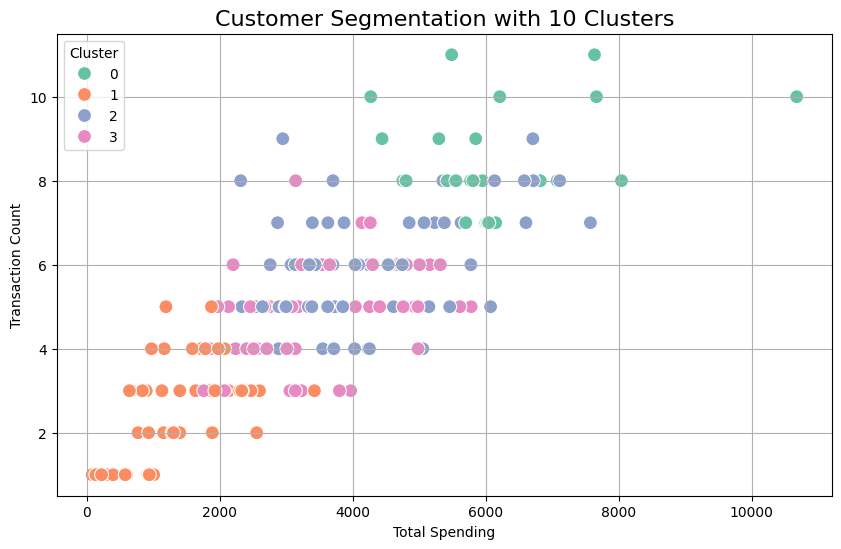

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x="TotalSpending", y="TransactionCount", hue="Cluster", palette="Set2", s=100)
plt.title(f"Customer Segmentation with {k} Clusters", fontsize=16)
plt.xlabel("Total Spending")
plt.ylabel("Transaction Count")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

**Summary of Clusters**

In [26]:
numeric_columns = merged_data.select_dtypes(include=["number"])
cluster_summary = numeric_columns.groupby(merged_data["Cluster"]).mean()
print("Cluster Summary:")
print(cluster_summary)

print("\nDavies-Bouldin Index:", db_index)

Cluster Summary:
           Region  TotalSpending  TransactionCount  Cluster
Cluster                                                    
0        0.739130    6149.225652          8.565217      0.0
1        1.690909    1506.418545          2.654545      1.0
2        2.647059    4161.076618          5.926471      2.0
3        0.547170    3448.247925          4.792453      3.0

Davies-Bouldin Index: 0.9767466369686408
